In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

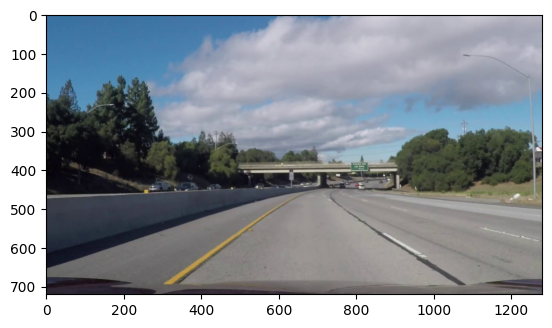

In [3]:
img = cv2.cvtColor(cv2.imread('/home/veeransh/Desktop/self-driven-car-ai/Data/image.png'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

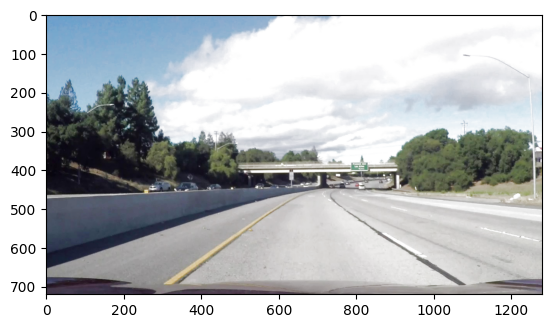

In [4]:
def change_light(image, coeff):
    image = np.copy(image)
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image_HLS = np.array(image_HLS, dtype = np.float64)
    image_HLS[:, :, 1] = image_HLS[:, :, 1] * coeff
    if coeff > 1:
        image_HLS[:, :, 1][image_HLS[:, :, 1] > 255] = 255
    else:
        image_HLS[:, :, 1][image_HLS[:, :, 1] < 0] = 0
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)
    return image_RGB


bright_img = change_light(img, 1 + np.random.uniform(0,1))
plt.imshow(bright_img)
plt.show()

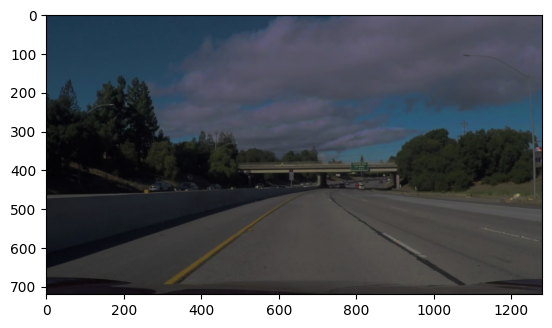

In [5]:
dark_img = change_light(img, 0.5)
plt.imshow(dark_img)
plt.show()

In [ ]:
import random

def generate_shadow_coordinates(
    imshape, no_of_shadows, rectangular_roi, shadow_dimension
):
    vertices_list = []
    x1 = rectangular_roi[0]
    y1 = rectangular_roi[1]
    x2 = rectangular_roi[2]
    y2 = rectangular_roi[3]
    for index in range(no_of_shadows):
        vertex = []
        for dimensions in range(
            shadow_dimension
        ):
            vertex.append((random.randint(x1, x2), random.randint(y1, y2)))
        vertices = np.array(
            [vertex], dtype = np.int32
        ) 
        vertices_list.append(vertices)
    return vertices_list

def shadow_process(image, no_of_shadows, x1, y1, x2, y2, shadow_dimension):
    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)  ## Conversion to HLS
    mask = np.zeros_like(image)
    imshape = image.shape
    vertices_list = generate_shadow_coordinates(
        imshape, no_of_shadows, (x1, y1, x2, y2), shadow_dimension
    )
    for vertices in vertices_list:
        cv2.fillPoly(
            mask, vertices, 255
        )
    image_HLS[:, :, 1][mask[:, :, 0] == 255] = (
        image_HLS[:, :, 1][mask[:, :, 0] == 255] * 0.5
    )
    image_RGB = cv2.cvtColor(image_HLS, cv2.COLOR_HLS2RGB)  ## Conversion to RGB
    return image_RGB


shadow_img = shadow_process(img,np.random.randint(1,5),0,img.shape[0]//2,img.shape[1],img.shape[0], 5)
plt.imshow(shadow_img)
plt.show()
